# The Sparks Foundation (GRIP'23)
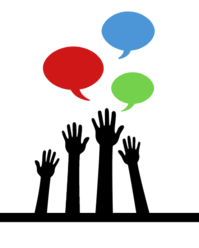
## Task 4 - Analysis on Global Terrorism

#### Aim: To find insights on global terrorism data set, determining security issues and hot-zones of terrorism

#### Author: Raghavesh Mishra


In [45]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [6]:
# getting the data
import chardet
with open('globalterrorism.csv', 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))
result
df = pd.read_csv('globalterrorism.csv',encoding = 'ISO-8859-1',dtype = {'date'})
df.head()

C:\Users\Raghav\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [7]:
# Size or the data
rows = df.shape[0]
col = df.shape[1]
print(f"There are {rows} rows and {col} columns in this data set")

There are 181691 rows and 135 columns in this data set


In [9]:
# Finding duplicate rows
df.duplicated().sum() # --> no duplicate information

0

In [15]:
# Handling null values:
df.isnull().sum()
# Here we can see that more than 80% values are null in two columns hence we drop them

eventid            0
iyear              0
imonth             0
iday               0
approxdate    172452
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       156653
Length: 135, dtype: int64

In [16]:
df.drop(['approxdate','related'],axis = 1, inplace = True)

### Decoding the variable names

eventid: ID for terrorist attack.

iyear: Year the terrorist attack occurred.

imonth: Month the terrorist attack occurred.

iday: Day the terrorist attack occurred.

country_txt: Name of the country where the terrorist attack occurred.

region_txt: Name of the region where the terrorist attack occurred.

city: City where the terrorist attack occurred.

attacktype1_txt: The general method of attack employed.

target1: The specific person, building, installation, etc., that was targeted.

nkill: Number of confirmed fatalities for the incident.

nwound: Number of confirmed non-fatal injuries.

gname: Name of the group that carried out the attack.

In [24]:
for i in df.columns:
    print(i)

eventid
iyear
imonth
iday
extended
resolution
country
country_txt
region
region_txt
provstate
city
latitude
longitude
specificity
vicinity
location
summary
crit1
crit2
crit3
doubtterr
alternative
alternative_txt
multiple
success
suicide
attacktype1
attacktype1_txt
attacktype2
attacktype2_txt
attacktype3
attacktype3_txt
targtype1
targtype1_txt
targsubtype1
targsubtype1_txt
corp1
target1
natlty1
natlty1_txt
targtype2
targtype2_txt
targsubtype2
targsubtype2_txt
corp2
target2
natlty2
natlty2_txt
targtype3
targtype3_txt
targsubtype3
targsubtype3_txt
corp3
target3
natlty3
natlty3_txt
gname
gsubname
gname2
gsubname2
gname3
gsubname3
motive
guncertain1
guncertain2
guncertain3
individual
nperps
nperpcap
claimed
claimmode
claimmode_txt
claim2
claimmode2
claimmode2_txt
claim3
claimmode3
claimmode3_txt
compclaim
weaptype1
weaptype1_txt
weapsubtype1
weapsubtype1_txt
weaptype2
weaptype2_txt
weapsubtype2
weapsubtype2_txt
weaptype3
weaptype3_txt
weapsubtype3
weapsubtype3_txt
weaptype4
weaptype4_txt
we

In [29]:
# let us rename the columns for better understanding
df.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','provstate':'state','region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed','nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type','weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)
df

,eventid,Year,Month,Day,extended,resolution,country,Country,region,Region,...,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
0,197000000001,1970,7,2,0,NaN,58,Dominican Republic,2,Central America & Caribbean,...,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0
1,197000000002,1970,0,0,0,NaN,130,Mexico,1,North America,...,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1
2,197001000001,1970,1,0,0,NaN,160,Philippines,5,Southeast Asia,...,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1
3,197001000002,1970,1,0,0,NaN,78,Greece,8,Western Europe,...,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1
4,197001000003,1970,1,0,0,NaN,101,Japan,4,East Asia,...,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,201712310022,2017,12,31,0,NaN,182,Somalia,11,Sub-Saharan Africa,...,NaN,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0
181687,201712310029,2017,12,31,0,NaN,200,Syria,10,Middle East & North Africa,...,NaN,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1
181688,201712310030,2017,12,31,0,NaN,160,Philippines,5,Southeast Asia,...,NaN,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0,0,0,0
181689,201712310031,2017,12,31,0,NaN,92,India,6,South Asia,...,NaN,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9


In [28]:
df['extended'].value_counts()[0]

173452

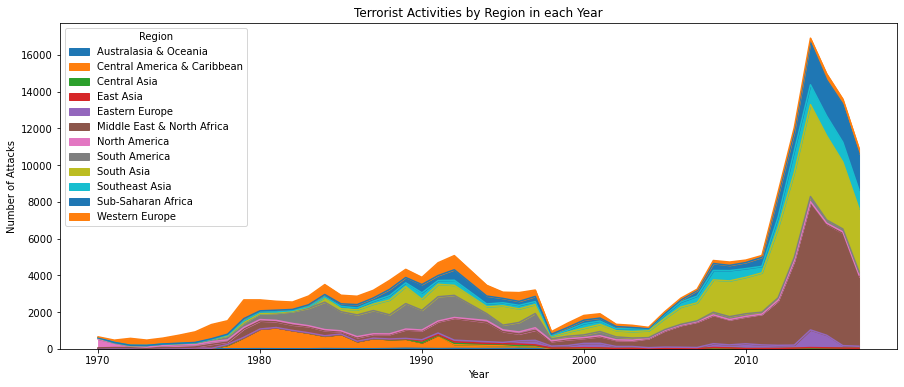

In [41]:
pd.crosstab(df.Year, df.Region).plot(kind='area',figsize=(15,6))
plt.title('Terrorist Activities by Region in each Year')
plt.ylabel('Number of Attacks')
plt.show()

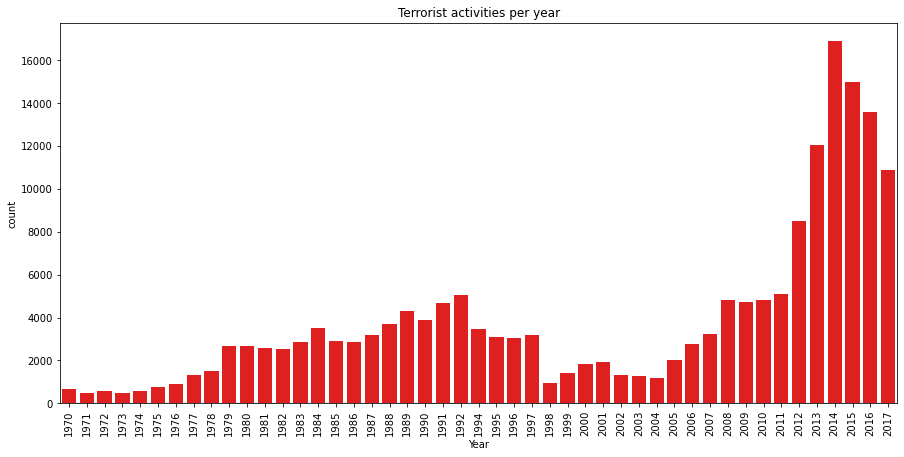

In [34]:
# Visualization of Terrorist Activities per year:
plt.figure(figsize=(15,7))
sns.countplot(data=df, x='Year',color = 'red')
plt.title('Terrorist activities per year')
plt.xticks(rotation=90)
plt.show()

In [43]:
# Rate of increase of attacks
Year=df.Year.value_counts().to_dict()
rate=((Year[2017]-Year[1970])/Year[2017])*100
print(Year[1970],'attacks happened in 1970 &',Year[2017],'attacks happened in 2017')
print('So the number of attacks from 1970 has increased by',np.round(rate,0),'% till 2017')

651 attacks happened in 1970 & 10900 attacks happened in 2017
So the number of attacks from 1970 has increased by 94.0 % till 2017


### Observations:
1. There has been an increase in the terrorist operations from year 2004 - 2014
2. Maximum terrorist attacks have happended in the year 2014
3. There is a decrease in the attacks from 2014 onwards
4. 651 attacks happened in 1970 & 10900 attacks happened in 2017
5. So the number of attacks from 1970 has increased by 94.0 % till 2017

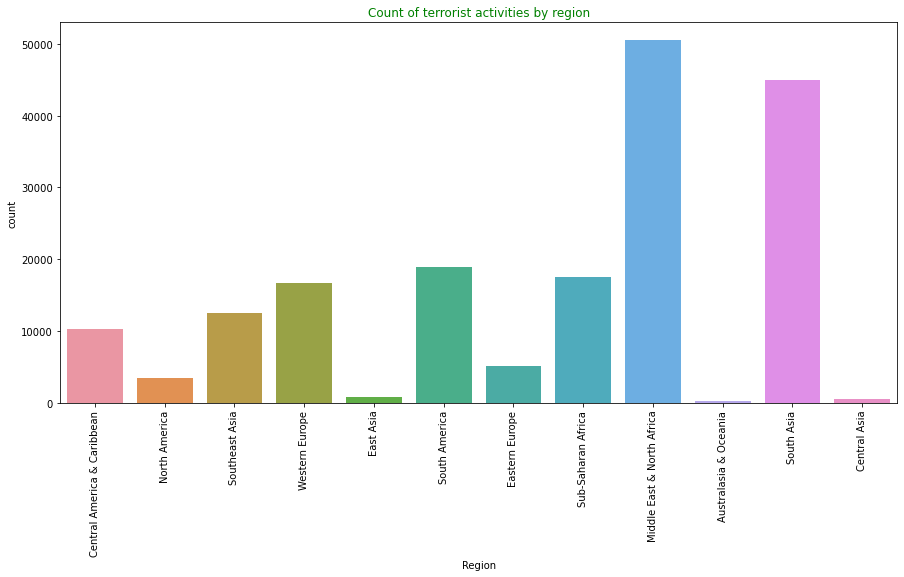

In [35]:
# Chart - 2 visualization code
plt.figure(figsize=(15,7))
sns.countplot(data=df, x='Region')
plt.title('Count of terrorist activities by region', color = 'green')
plt.xticks(rotation=90)
plt.show()


In [47]:
terr=df.groupby(['Country'],as_index=False).count()
fig=px.choropleth(terr,locations='Country',locationmode='country names',
                  color='Year',hover_name='Country',projection='orthographic',
                  title='Total number of attacks (1970-2017)',labels={'Year':'Attacks'})
fig.show()

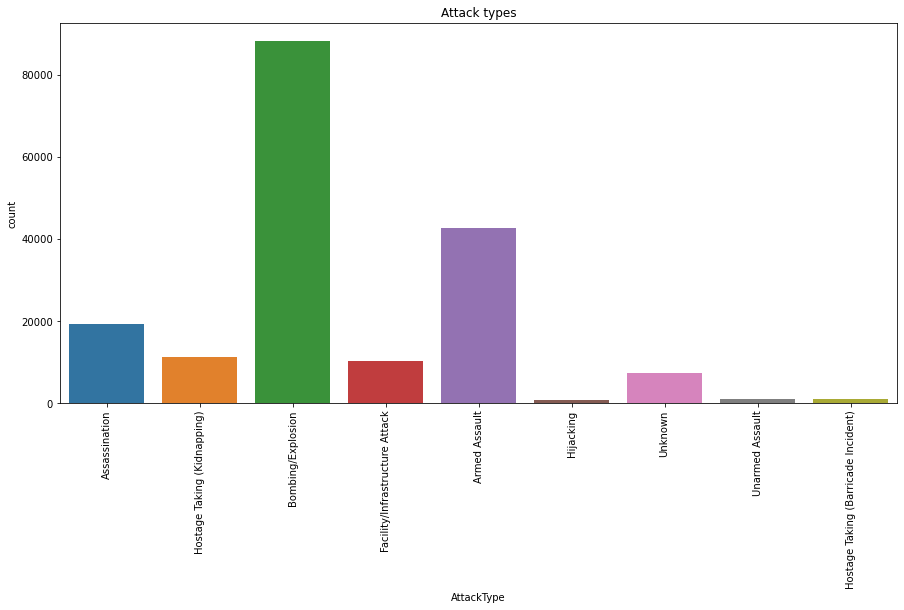

In [37]:
# Attack types:
plt.figure(figsize=(15,7))
sns.countplot(data=df, x='AttackType')
plt.title('Attack types')
plt.xticks(rotation=90)
plt.show()

C:\Users\Raghav\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



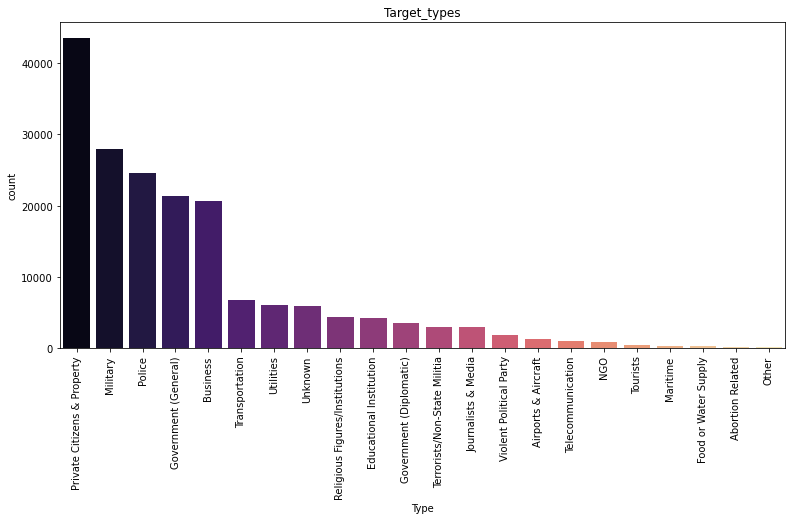

In [49]:
# Types of target:
plt.figure(figsize=(13,6))
sns.countplot(df['Target_type'],order=df['Target_type'].value_counts().index,
              palette='magma')
plt.xticks(rotation=90)
plt.xlabel('Type')
plt.title('Target_types')
plt.show()

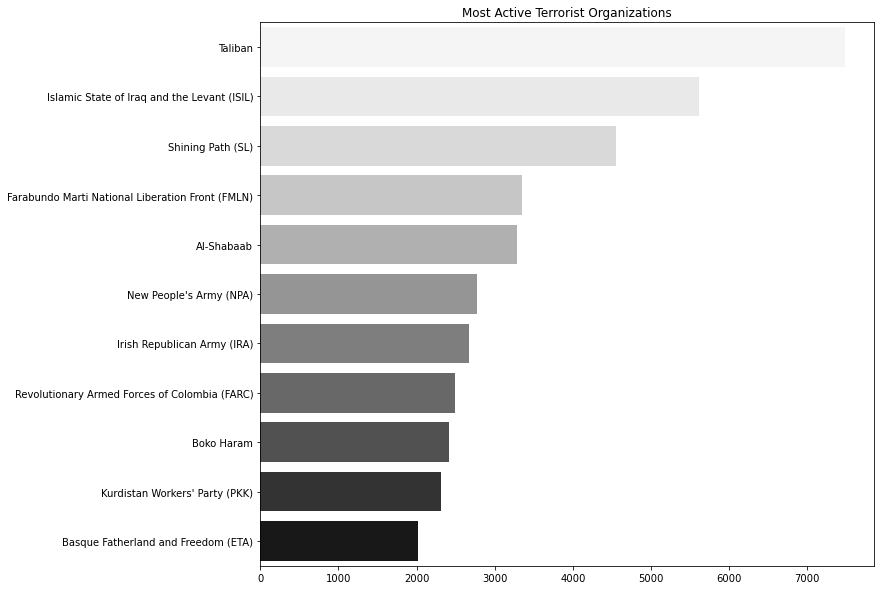

In [55]:
# Terrorist organizations:
plt.subplots(figsize=(11,10))
sns.barplot(y=df['Group'].value_counts()[1:12].index,x=df['Group'].value_counts()[1:12].values,
           palette='Greys')
plt.title('Most Active Terrorist Organizations')
plt.show()

In [58]:
# Countries Sufferring max n min damage
max_count=terr['Year'].max()
max_id=terr['Year'].idxmax()
max_name=terr['Country'][max_id]
min_count=terr['Year'].min()
min_id=terr['Year'].idxmin()
min_name=terr['Country'][min_id]
print(max_name,'has suffered the maximum number of terror attacks of',max_count)
print(min_name,'has suffered the minimum number of terror attacks of',min_count)

Iraq has suffered the maximum number of terror attacks of 24636
Andorra has suffered the minimum number of terror attacks of 1


# Insights Derived by performing the EDA
1. Iraq has the most attacks whereas Andorra has suffered the minimum.
2. Taliban and ISIL are the most active organisation.
3. Middle East & North Africa and South Asisa are the hotspots of terrorism
3. Maximum number of attacks are from Bombing/Explosions.
4. The maximum number of attacks are on Private citizens and Property.
5. The Middle East and North Africa Regions has most taregeted.

# Solutions 

Prioritize Major Threat Groups: Our analysis shows that certain terrorist groups are more active than others. Intelligence efforts should be concentrated on these high-impact groups to prevent future attacks.

Target Most Common Attack Types: Understanding the most common types of attacks used by terrorists can help in developing preventive measures and response strategies. For instance, if bombings are the most common attack type, more resources could be directed towards bomb detection and disposal.

The Security should be improved at the borders and international organizations should be banned. Also strict immigration laws should be put in place to keep a check on the citizen. Import of weapons should be strictly banned